Month 1: Demand Index = 1.00, Price = $155.94
Month 2: Demand Index = 1.46, Price = $227.85
Month 3: Demand Index = 1.29, Price = $200.55
Month 4: Demand Index = 1.18, Price = $183.91
Month 5: Demand Index = 0.82, Price = $128.67
Month 6: Demand Index = 0.82, Price = $128.67
Month 7: Demand Index = 0.75, Price = $116.45
Month 8: Demand Index = 1.39, Price = $217.3
Month 9: Demand Index = 1.18, Price = $184.22
Month 10: Demand Index = 1.27, Price = $197.57
Month 11: Demand Index = 0.72, Price = $111.77
Month 12: Demand Index = 1.48, Price = $230.24


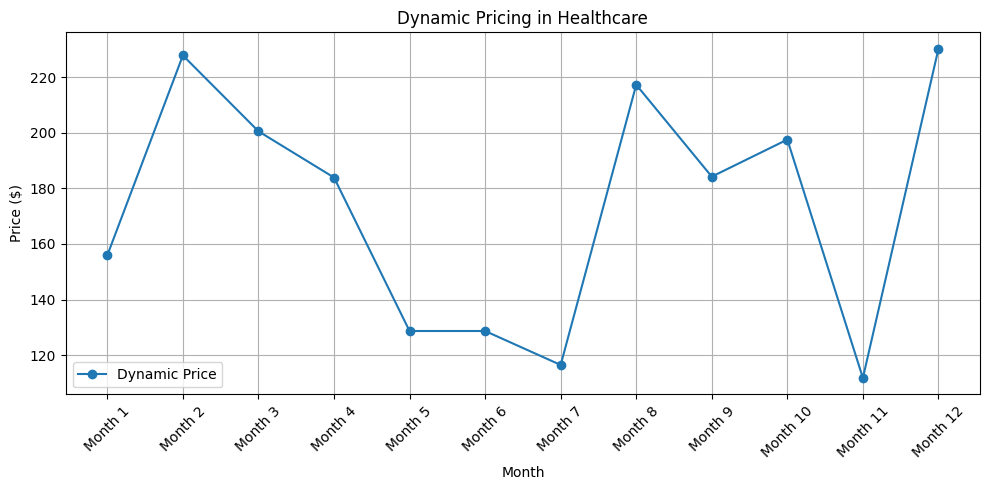

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class HealthcareDynamicPricing:
    def __init__(self, base_cost, complexity_factor, target_margin):
        """
        Initialize the dynamic pricing model.
        :param base_cost: Fixed cost per unit of service.
        :param complexity_factor: Adjusts price based on service complexity (0-1 scale).
        :param target_margin: Desired profit margin (e.g., 0.2 for 20%).
        """
        self.base_cost = base_cost
        self.complexity_factor = complexity_factor
        self.target_margin = target_margin

    def calculate_price(self, demand_index):
        """
        Calculate dynamic price based on demand and complexity.
        :param demand_index: Demand index (0.5 = low demand, 1.0 = average, 1.5 = high demand).
        :return: Dynamic price.
        """
        adjusted_cost = self.base_cost * (1 + self.complexity_factor)
        dynamic_price = adjusted_cost * (1 + self.target_margin) * demand_index
        return round(dynamic_price, 2)

    def simulate_pricing(self, demand_fluctuations):
        """
        Simulate dynamic pricing over time based on demand fluctuations.
        :param demand_fluctuations: List of demand indices.
        :return: List of calculated prices.
        """
        prices = [self.calculate_price(d) for d in demand_fluctuations]
        return prices

# Example usage
if __name__ == "__main__":
    # Parameters
    base_cost = 100  # Fixed cost for service
    complexity_factor = 0.3  # Complexity adjustment (30%)
    target_margin = 0.2  # 20% profit margin

    # Create pricing model
    pricing_model = HealthcareDynamicPricing(base_cost, complexity_factor, target_margin)

    # Simulate demand fluctuations (e.g., over 12 months)
    np.random.seed(42)
    demand_fluctuations = np.random.uniform(0.7, 1.5, 12)  # Demand index between 0.7 and 1.5

    # Calculate dynamic prices
    prices = pricing_model.simulate_pricing(demand_fluctuations)

    # Display results
    months = [f"Month {i+1}" for i in range(12)]
    for month, demand, price in zip(months, demand_fluctuations, prices):
        print(f"{month}: Demand Index = {demand:.2f}, Price = ${price}")

    # Plotting the results
    plt.figure(figsize=(10, 5))
    plt.plot(months, prices, marker='o', label='Dynamic Price')
    plt.title('Dynamic Pricing in Healthcare')
    plt.xlabel('Month')
    plt.ylabel('Price ($)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
